1. Использовать деревья решений для классификации данных из предыдущего задания (своих, товарища и представленных в задании). Проверить, приведёт ли нормализация или замена части признаков бинарными к улучшению результатов. Также построить деревья на части признаков, перебирая все N'ки или выбирая N признаков случайным образом. Вывести в каком-либо удобочитаемом виде содержимое узлов "лучших" из построенных деревьев.

2. Использовать метод k-ближайших соседей и деревья решений для предсказания оценок ОГЭ (из задания 2).

3. Сделать выводы о преимуществах и недостатках рассмотренных методов классификации как в общем, так и применительно к рассмотренным задачам.

In [ ]:
from google.colab import files
import pandas as pd

#uploaded = files.upload()
#myCSV = pd.read_csv('myCSV.csv', delimiter=';')
#uploaded = files.upload()
#partnerCSV = pd.read_csv('KatyaVoronina3.csv', delimiter=',')
uploaded = files.upload()
otherCSV = pd.read_csv('otherCSV.csv', delimiter=';')
uploaded = files.upload()
oge = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx')

Saving otherCSV.csv to otherCSV.csv


Saving 5_OGE_2019_Эксперты и анализ.xlsx to 5_OGE_2019_Эксперты и анализ.xlsx


In [ ]:
# 1) Замена части признаков бинарными (без изменения)
sodium = []
for index, row in otherCSV.iterrows():
  if row["Sodium_(mg)"] > 200:
    sodium.append(1)
  else:
    sodium.append(0)

fiber_td = []
for index, row in otherCSV.iterrows():
  if row["Fiber_TD_(g)"] > 0:
    fiber_td.append(1)
  else:
    fiber_td.append(0)

energy = []
for index, row in otherCSV.iterrows():
  if row["Energ_Kcal"] > 100:
    energy.append(1)
  else:
    energy.append(0)

otherCSV = otherCSV.drop('Sodium_(mg)', axis=1)
otherCSV = otherCSV.drop('Fiber_TD_(g)', axis=1)
otherCSV = otherCSV.drop('Energ_Kcal', axis=1)

otherCSV.insert(10, "Bin_Sodium", sodium, True)
otherCSV.insert(10, "Bin_Fiber_TD", fiber_td, True)
otherCSV.insert(10, "Bin_Energy", energy, True)

0.5898748577929466
('Water_(g)', 'Sugar_Tot_(g)')
|--- feature_1 <= 0.50
|   |--- feature_0 <= 71.50
|   |   |--- feature_0 <= 28.18
|   |   |   |--- feature_0 <= 16.50
|   |   |   |   |--- feature_0 <= 14.55
|   |   |   |   |   |--- feature_0 <= 1.30
|   |   |   |   |   |   |--- feature_0 <= 1.05
|   |   |   |   |   |   |   |--- feature_0 <= 0.65
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.25
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.25
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.65
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.90
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.90
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1.05
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  1.30
|   |   |   |   |   |   |--- feature_0 <= 5.10


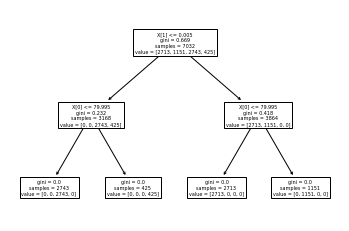

In [ ]:
# 1) Перебор N признаков
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import itertools
from sklearn.tree import export_text

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(otherCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(otherCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(otherCSV['GmWt_Desc2'])

otherCSV = otherCSV.drop('Shrt_Desc', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc1', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc2', axis=1)

otherCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
otherCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
otherCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

otherCSV = otherCSV.fillna(0)

accuracy = 0
foundFeatures = []
foundCLF = 0
withoutClass = otherCSV.loc[:, otherCSV.columns != 'CLASS']
Y = otherCSV['CLASS']

coms = itertools.combinations(withoutClass, 2)
for combination in coms:
  X = otherCSV[[combination[0], combination[1]]]

  x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(x_training_data, y_training_data)

  y_pred = clf.predict(x_test_data)

  newAccuracy = metrics.accuracy_score(y_test_data, y_pred)
  if (newAccuracy > accuracy):
    accuracy = newAccuracy
    foundFeatures = combination
    foundCLF = clf

print(newAccuracy)
print(foundFeatures)
tree.plot_tree(foundCLF)

r = export_text(clf)
print(r)


Accuracy: 1.0


[Text(0.5, 0.8333333333333334, 'X[8] <= 0.005\ngini = 0.67\nsamples = 7032\nvalue = [2689, 1176, 2738, 429]'),
 Text(0.25, 0.5, 'X[1] <= 79.995\ngini = 0.234\nsamples = 3167\nvalue = [0, 0, 2738, 429]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2738\nvalue = [0, 0, 2738, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 429\nvalue = [0, 0, 0, 429]'),
 Text(0.75, 0.5, 'X[1] <= 79.995\ngini = 0.423\nsamples = 3865\nvalue = [2689, 1176, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2689\nvalue = [2689, 0, 0, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1176\nvalue = [0, 1176, 0, 0]')]

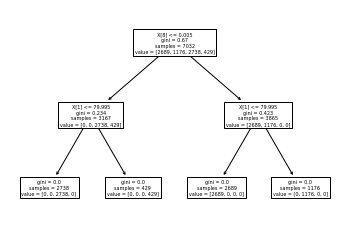

In [ ]:
# 1) otherCSV
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(otherCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(otherCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(otherCSV['GmWt_Desc2'])

otherCSV = otherCSV.drop('Shrt_Desc', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc1', axis=1)
otherCSV = otherCSV.drop('GmWt_Desc2', axis=1)

otherCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
otherCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
otherCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

otherCSV = otherCSV.fillna(0)
#print(np.any(np.isnan(otherCSV)))

X = otherCSV.loc[:, otherCSV.columns != 'CLASS']
Y = otherCSV['CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

# 1) Нормализация (без изменения)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(x_training_data)
#X_test = scaler.transform(x_test_data)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_training_data, y_training_data)

y_pred = clf.predict(x_test_data)

print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred))

tree.plot_tree(clf)

In [ ]:
# 1) partnerCSV
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(partnerCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(partnerCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(partnerCSV['GmWt_Desc2'])

partnerCSV = partnerCSV.drop('Shrt_Desc', axis=1)
partnerCSV = partnerCSV.drop('GmWt_Desc1', axis=1)
partnerCSV = partnerCSV.drop('GmWt_Desc2', axis=1)

partnerCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
partnerCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
partnerCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

partnerCSV = partnerCSV.fillna(0)
#print(np.any(np.isnan(otherCSV)))

X = partnerCSV.loc[:, partnerCSV.columns != 'class 3']
Y = partnerCSV['class 3']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_training_data, y_training_data)

y_pred = clf.predict(x_test_data)

print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred))

tree.plot_tree(clf)

Accuracy: 1.0


[Text(0.6, 0.8333333333333334, 'X[2] <= 65.995\ngini = 0.648\nsamples = 7032\nvalue = [1824, 2085, 3123]'),
 Text(0.4, 0.5, 'X[2] <= 32.985\ngini = 0.498\nsamples = 3909\nvalue = [1824, 2085, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1824\nvalue = [1824, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2085\nvalue = [0, 2085, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3123\nvalue = [0, 0, 3123]')]

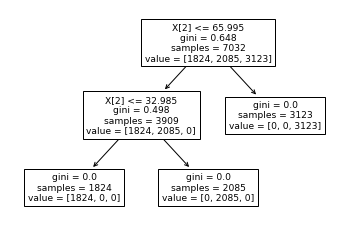

In [ ]:
# 1) myCSV
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(myCSV['Shrt_Desc'])
stringColumn2 = le.fit_transform(myCSV['GmWt_Desc1'])
stringColumn3 = le.fit_transform(myCSV['GmWt_Desc2'])

myCSV = myCSV.drop('Shrt_Desc', axis=1)
myCSV = myCSV.drop('GmWt_Desc1', axis=1)
myCSV = myCSV.drop('GmWt_Desc2', axis=1)

myCSV.insert(10, 'Shrt_Desc', stringColumn1, True)
myCSV.insert(10, 'GmWt_Desc1', stringColumn2, True)
myCSV.insert(10, 'GmWt_Desc2', stringColumn3, True)

myCSV = myCSV.fillna(0)
#print(np.any(np.isnan(otherCSV)))

X = myCSV.loc[:, myCSV.columns != 'class']
Y = myCSV['class']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_training_data, y_training_data)

y_pred = clf.predict(x_test_data)

print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred))

tree.plot_tree(clf)

In [ ]:
# 2) knn для ОГЭ
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(oge['Краткое наименование ОО'])
stringColumn2 = le.fit_transform(oge['Вид ОО'])
stringColumn3 = le.fit_transform(oge['Тип ОО'])
stringColumn4 = le.fit_transform(oge['Выпускник'])
stringColumn5 = le.fit_transform(oge['Часть С'])

oge = oge.drop('Краткое наименование ОО', axis=1)
oge = oge.drop('Вид ОО', axis=1)
oge = oge.drop('Тип ОО', axis=1)
oge = oge.drop('Выпускник', axis=1)
oge = oge.drop('Часть В', axis=1)
oge = oge.drop('Часть С', axis=1)
oge = oge.drop('Код предмета', axis=1)
oge = oge.drop('Предмет', axis=1)

oge.insert(10, 'Краткое наименование ОО', stringColumn1, True)
oge.insert(10, 'Вид ОО', stringColumn2, True)
oge.insert(10, 'Тип ОО', stringColumn3, True)
oge.insert(10, 'Выпускник', stringColumn4, True)
oge.insert(10, 'Часть С', stringColumn5, True)

oge = oge.fillna(0)
#print(np.any(np.isnan(otherCSV)))

X = oge.loc[:, oge.columns != 'Оцека по 5']
Y = oge['Оцека по 5']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_training_data)
predictions = model.predict(X_test)

print(classification_report(y_test_data, predictions))


              precision    recall  f1-score   support

           2       0.65      0.95      0.77        43
           3       0.92      0.85      0.89       410
           4       0.90      0.79      0.84       451
           5       0.81      1.00      0.90       294

    accuracy                           0.87      1198
   macro avg       0.82      0.90      0.85      1198
weighted avg       0.88      0.87      0.87      1198



Accuracy: 1.0


[Text(0.5, 0.8333333333333334, 'X[29] <= 11.5\ngini = 0.685\nsamples = 4788\nvalue = [181, 1656, 1679, 1272]'),
 Text(0.25, 0.5, 'X[29] <= 3.5\ngini = 0.178\nsamples = 1837\nvalue = [181, 1656, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 181\nvalue = [181, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1656\nvalue = [0, 1656, 0, 0]'),
 Text(0.75, 0.5, 'X[30] <= 79.0\ngini = 0.49\nsamples = 2951\nvalue = [0, 0, 1679, 1272]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1679\nvalue = [0, 0, 1679, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1272\nvalue = [0, 0, 0, 1272]')]

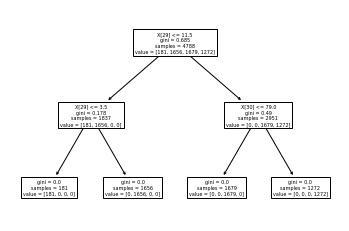

In [ ]:
# 2) decisionTree для ОГЭ
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

le = preprocessing.LabelEncoder()
stringColumn1 = le.fit_transform(oge['Краткое наименование ОО'])
stringColumn2 = le.fit_transform(oge['Вид ОО'])
stringColumn3 = le.fit_transform(oge['Тип ОО'])
stringColumn4 = le.fit_transform(oge['Выпускник'])
stringColumn5 = le.fit_transform(oge['Часть С'])

oge = oge.drop('Краткое наименование ОО', axis=1)
oge = oge.drop('Вид ОО', axis=1)
oge = oge.drop('Тип ОО', axis=1)
oge = oge.drop('Выпускник', axis=1)
oge = oge.drop('Часть В', axis=1)
oge = oge.drop('Часть С', axis=1)
oge = oge.drop('Код предмета', axis=1)
oge = oge.drop('Предмет', axis=1)

oge.insert(10, 'Краткое наименование ОО', stringColumn1, True)
oge.insert(10, 'Вид ОО', stringColumn2, True)
oge.insert(10, 'Тип ОО', stringColumn3, True)
oge.insert(10, 'Выпускник', stringColumn4, True)
oge.insert(10, 'Часть С', stringColumn5, True)

oge = oge.fillna(0)
#print(np.any(np.isnan(otherCSV)))

X = oge.loc[:, oge.columns != 'Оцека по 5']
Y = oge['Оцека по 5']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.2)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_training_data, y_training_data)

y_pred = clf.predict(x_test_data)

print("Accuracy:",metrics.accuracy_score(y_test_data, y_pred))

tree.plot_tree(clf)